In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_cluster=pd.read_csv('df_cluster.csv')
df_cluster.head()

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,Churn_probability,transaction/day,CLV,recency
0,0.148148,0,XW0DQ7H,2017-08-17,0,xxxxxxxx,2025-10-25 16:08:02,0.991220,0.514859,0.526717,...,0,1,0,0,0,0,0.003610,0.850001,10.591081,0.975000
1,0.407407,0,5K0N3X1,2017-08-28,0,CID21329,2025-10-25 12:38:13,0.990244,0.515803,0.121456,...,0,0,1,0,0,0,0.003547,0.217005,8.883273,0.987342
2,0.629630,0,1F2TCL3,2016-11-11,1,CID12313,2025-10-25 22:53:21,0.988293,0.550486,0.204074,...,1,0,0,0,0,0,0.964750,0.308034,0.000148,0.829787
3,0.500000,1,VJGJ33N,2016-10-29,1,CID3793,2025-10-25 15:57:50,0.985366,0.473971,0.246577,...,1,0,0,0,0,0,0.970951,0.469295,0.000066,0.795918
4,0.388889,0,SVZXCWB,2017-09-12,0,xxxxxxxx,2025-10-25 15:46:44,0.994146,0.483866,0.238950,...,1,0,0,0,0,0,0.959872,0.391017,0.000203,0.975000


# KMeans

In [4]:
from sklearn.cluster import KMeans
x_cluster=df_cluster[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']]

In [5]:
from sklearn.metrics import silhouette_score
wcss=[]
silhoutte_scores=[]

for k in range(2,8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_cluster)
    wcss.append(kmeans.inertia_)
    silhoutte_scores.append(silhouette_score(x_cluster,kmeans.labels_))

Text(0, 0.5, 'WCSS')

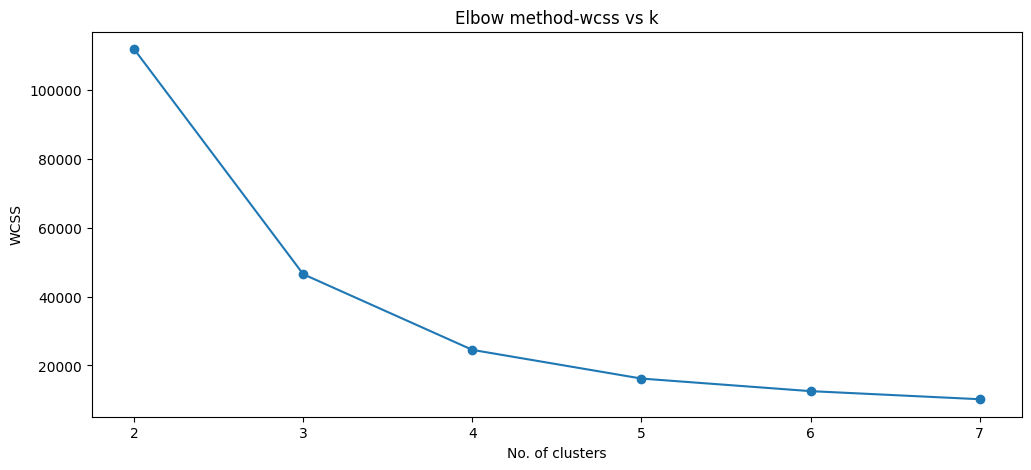

In [6]:
plt.figure(figsize=(12,5))
plt.plot(range(2,8),wcss,marker='o')
plt.title("Elbow method-wcss vs k")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

Text(0, 0.5, 'Silhouette Score')

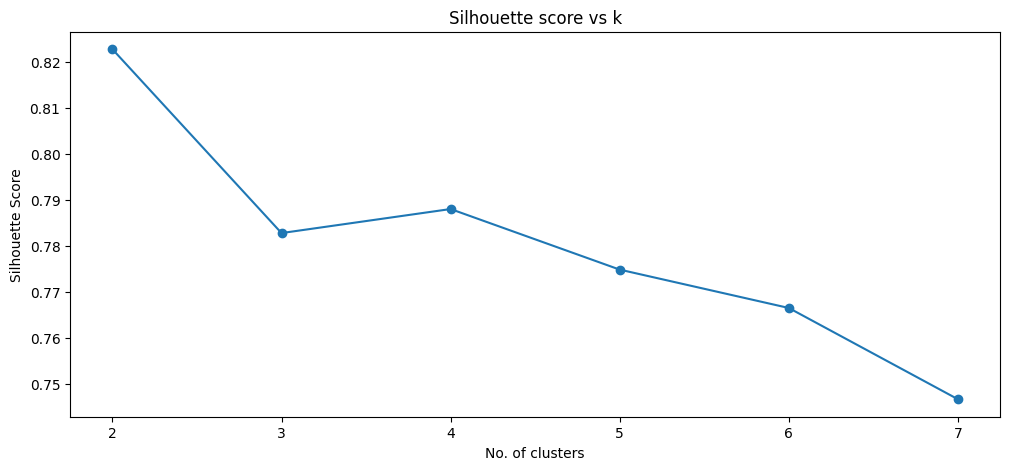

In [7]:
plt.figure(figsize=(12,5))
plt.plot(range(2,8),silhoutte_scores,marker='o')
plt.title("Silhouette score vs k")
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")

#### Though optimal no. of clusters comea out to be 4, but after the proper knowledge of the dataset, the customers will be divided into 3 categories on the basis of their CLV(Customer Lifetime Value) and Churn Probability

In [8]:
kmeans=KMeans(n_clusters=3,random_state=42)
df_cluster['cluster_kmeans']=kmeans.fit_predict(x_cluster)

In [9]:
cluster_summary=df_cluster.groupby('cluster_kmeans')[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']].mean()
cluster_summary

,CLV,Churn_probability,avg_transaction_value,api_calls_90d
cluster_kmeans,,,,
0,0.045048,0.870871,0.248333,0.038285
1,11.002008,0.004011,0.365068,0.456485
2,6.576290,0.011231,0.333722,0.268182


Text(0.5, 1.0, 'Customer Segmentation by KMeans')

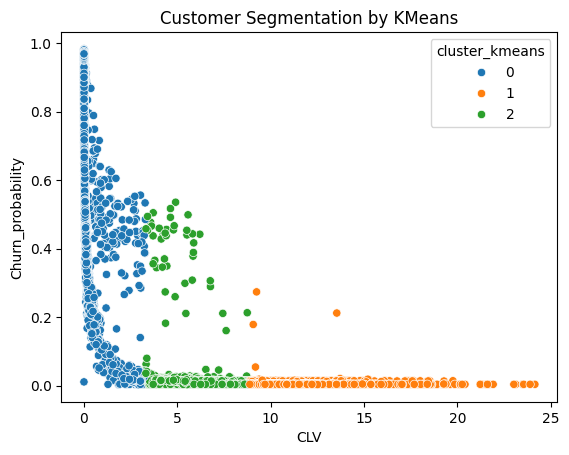

In [10]:
import seaborn as sns
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=df_cluster['cluster_kmeans'],palette='tab10')
plt.title("Customer Segmentation by KMeans")

# Gaussian Mixture Model

In [11]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3,random_state=42)
df_cluster['cluster_gmm']=gmm.fit_predict(x_cluster)

In [12]:
gmm_cluster=df_cluster.groupby('cluster_gmm')[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']].mean()
gmm_cluster

,CLV,Churn_probability,avg_transaction_value,api_calls_90d
cluster_gmm,,,,
0,0.000250,0.964859,0.247583,0.022415
1,9.865060,0.003646,0.384394,0.458016
2,2.588271,0.331397,0.249568,0.094444


Text(0.5, 1.0, 'Customer Segmentation by GMM')

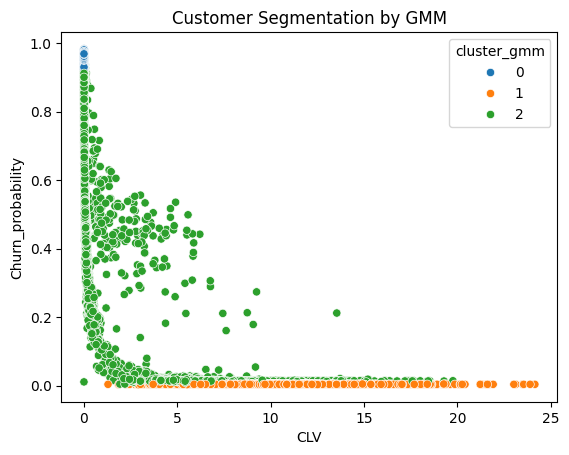

In [13]:
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=df_cluster['cluster_gmm'],palette='tab10')
plt.title("Customer Segmentation by GMM")

### Thus, KMeans performs better than Gaussian Mixture Model. So,

In [14]:
final_cluster=KMeans(n_clusters=3,random_state=42)
df_cluster['final_segmentation']=final_cluster.fit_predict(x_cluster)

In [15]:
cluster_summary_final=df_cluster.groupby('final_segmentation')[['CLV','Churn_probability','avg_transaction_value','api_calls_90d']].mean()
cluster_summary_final

,CLV,Churn_probability,avg_transaction_value,api_calls_90d
final_segmentation,,,,
0,0.045048,0.870871,0.248333,0.038285
1,11.002008,0.004011,0.365068,0.456485
2,6.576290,0.011231,0.333722,0.268182


In [16]:
df_cluster['final_segmentation']=df_cluster['final_segmentation'].replace({1:'VIP Loyalists',2:'Casual Shoppers & Bargain Hunters',0:'Occasional Buyers & Lost Customers'})

Text(0.5, 1.0, 'Final Segmentation of Customers')

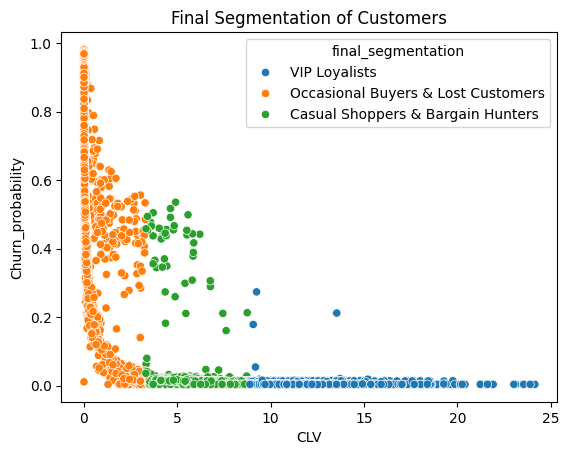

In [17]:
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=df_cluster['final_segmentation'],palette='tab10')
plt.title("Final Segmentation of Customers")

In [18]:
def refine_clusters(df):
    def refine_(row):
        if row['final_segmentation']=='Occasional Buyers & Lost Customers':
            if row['Churn_probability']>=0.5:
                return "High Risk Customers"
            else:
                return "Occasional Buyers"
        elif row['final_segmentation']=='Casual Shoppers & Bargain Hunters':
            if row['Churn_probability']>=0.2:
                return "Casual Shoppers"
            else:
                return "Bargain Hunters"
        else:
            return "VIP Loyalists"
    df['final_segmentation']=df.apply(refine_,axis=1)
    return df

In [19]:
refine_clusters(df_cluster)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,Churn_probability,transaction/day,CLV,recency,cluster_kmeans,cluster_gmm,final_segmentation
0,0.148148,0,XW0DQ7H,2017-08-17,0,xxxxxxxx,2025-10-25 16:08:02,0.991220,0.514859,0.526717,...,0,0,0,0.003610,0.850001,10.591081,0.975000,1,1,VIP Loyalists
1,0.407407,0,5K0N3X1,2017-08-28,0,CID21329,2025-10-25 12:38:13,0.990244,0.515803,0.121456,...,0,0,0,0.003547,0.217005,8.883273,0.987342,1,1,VIP Loyalists
2,0.629630,0,1F2TCL3,2016-11-11,1,CID12313,2025-10-25 22:53:21,0.988293,0.550486,0.204074,...,0,0,0,0.964750,0.308034,0.000148,0.829787,0,0,High Risk Customers
3,0.500000,1,VJGJ33N,2016-10-29,1,CID3793,2025-10-25 15:57:50,0.985366,0.473971,0.246577,...,0,0,0,0.970951,0.469295,0.000066,0.795918,0,0,High Risk Customers
4,0.388889,0,SVZXCWB,2017-09-12,0,xxxxxxxx,2025-10-25 15:46:44,0.994146,0.483866,0.238950,...,0,0,0,0.959872,0.391017,0.000203,0.975000,0,0,High Risk Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,0.666667,0,6F51HFO,2017-09-21,0,xxxxxxxx,2025-10-25 04:14:05,0.976585,0.357610,0.267140,...,0,0,0,0.970829,0.508432,0.000066,0.987342,0,0,High Risk Customers
36988,0.351852,0,21KSM8Y,2016-06-27,0,xxxxxxxx,2025-10-25 23:18:31,0.987317,0.359686,0.103611,...,0,0,0,0.970914,0.145131,0.000068,0.772277,0,0,High Risk Customers
36989,0.240741,0,XK1IM9H,2016-09-11,1,CID3838,2025-10-25 03:50:25,0.986341,0.490777,0.376609,...,0,0,0,0.968701,0.616484,0.000100,0.772277,0,0,High Risk Customers
36990,0.796296,1,K6VTP1Z,2017-06-15,0,xxxxxxxx,2025-10-25 09:50:03,0.989268,0.544940,0.015925,...,0,0,0,0.003547,0.024676,7.394920,1.000000,2,1,Bargain Hunters


In [20]:
new=df_cluster[['CLV','Churn_probability','final_segmentation']]
new['final_segmentation'].unique()

array(['VIP Loyalists', 'High Risk Customers', 'Bargain Hunters',
       'Occasional Buyers', 'Casual Shoppers'], dtype=object)

<Axes: xlabel='CLV', ylabel='Churn_probability'>

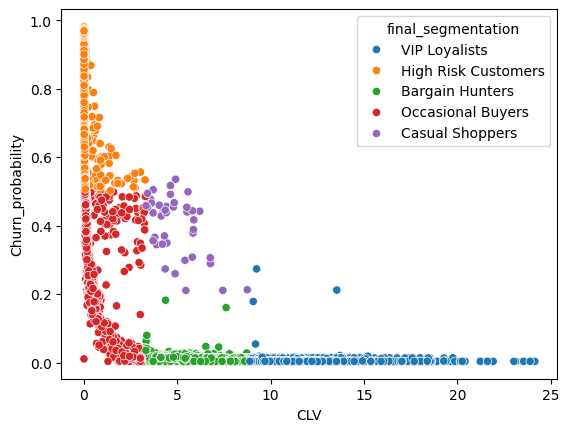

In [21]:
sns.scatterplot(x=df_cluster['CLV'],y=df_cluster['Churn_probability'],hue=new['final_segmentation'],palette='tab10')

# More insights from the clusters & data

In [22]:
total_customers=df_cluster['final_segmentation'].shape
d=df_cluster['final_segmentation'].value_counts()   # no. of customers in each segment

In [23]:
d

final_segmentation
High Risk Customers    20550
VIP Loyalists           7478
Bargain Hunters         6596
Occasional Buyers       2326
Casual Shoppers           42
Name: count, dtype: int64

In [24]:
t=(d/total_customers)*100. # percentage share
t

final_segmentation
High Risk Customers    55.552552
VIP Loyalists          20.215182
Bargain Hunters        17.830882
Occasional Buyers       6.287846
Casual Shoppers         0.113538
Name: count, dtype: float64

In [25]:
u=df_cluster['final_segmentation'].unique()
u

array(['VIP Loyalists', 'High Risk Customers', 'Bargain Hunters',
       'Occasional Buyers', 'Casual Shoppers'], dtype=object)

In [26]:
y=[[]]
for i in range(u.shape[0]):
    revenue=0
    flag=u[i]
    for j in range(df_cluster.shape[0]):
        if df_cluster['final_segmentation'][j]==flag:
            revenue=revenue+df_cluster['CLV'][j]
    y.append([flag,revenue])

In [27]:
y=pd.DataFrame(y,columns=('Segment','Total Revenue')).drop(0)

In [28]:
y

,Segment,Total Revenue
1,VIP Loyalists,82273.016447
2,High Risk Customers,163.258426
3,Bargain Hunters,43448.824208
4,Occasional Buyers,867.266567
5,Casual Shoppers,204.590323


In [29]:
y['Their % no.']=t[1],t[0],t[2],t[3],t[4]

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_40115/1327766691.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y['Their % no.']=t[1],t[0],t[2],t[3],t[4]


In [30]:
y['Total Revenue']=y['Total Revenue'].astype('float64')

In [31]:
y=y.sort_values(by='Total Revenue',ascending=False)

In [32]:
y

,Segment,Total Revenue,Their % no.
1,VIP Loyalists,82273.016447,20.215182
3,Bargain Hunters,43448.824208,17.830882
4,Occasional Buyers,867.266567,6.287846
5,Casual Shoppers,204.590323,0.113538
2,High Risk Customers,163.258426,55.552552


In [33]:
hr=y['Total Revenue'][2]/d[0]
ob=y['Total Revenue'][4]/d[3]
cs=y['Total Revenue'][5]/d[4]
bh=y['Total Revenue'][3]/d[2]
vl=y['Total Revenue'][1]/d[1]

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_40115/199235181.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hr=y['Total Revenue'][2]/d[0]
/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_40115/199235181.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ob=y['Total Revenue'][4]/d[3]
/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_40115/199235181.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

In [34]:
y['Average Revenue Contribution by each']=vl,bh,ob,cs,hr

In [35]:
y

,Segment,Total Revenue,Their % no.,Average Revenue Contribution by each
1,VIP Loyalists,82273.016447,20.215182,11.002008
3,Bargain Hunters,43448.824208,17.830882,6.587147
4,Occasional Buyers,867.266567,6.287846,0.372858
5,Casual Shoppers,204.590323,0.113538,4.871198
2,High Risk Customers,163.258426,55.552552,0.007944


([<matplotlib.patches.Wedge at 0x327f239d0>,
 [Text(-0.6525649347601734, 0.8855275297366259, 'VIP Loyalists'),
  Text(-1.063160434447866, -0.28229397907965514, 'Bargain Hunters'),
  Text(-0.5782808520738417, -0.9357303330152079, 'Occasional Buyers'),
  Text(-0.37971183974138123, -1.0323850632202192, 'Casual Shoppers'),
  Text(1.0833065721635842, -0.19091063539568784, 'High Risk Customers')],
 [Text(-0.35594450986918547, 0.48301501621997767, '20.2%'),
  Text(-0.5799056915170178, -0.15397853404344825, '17.8%'),
  Text(-0.3154259193130045, -0.5103983634628406, '6.3%'),
  Text(-0.20711554894984427, -0.5631191253928467, '0.1%'),
  Text(0.5908944939074096, -0.10413307385219335, '55.6%')])

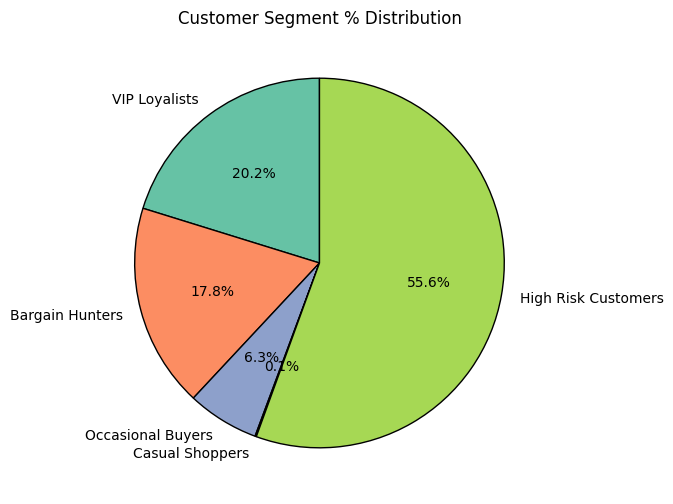

In [36]:
plt.figure(figsize=(10,6))
plt.title("Customer Segment % Distribution")
plt.pie(
    y['Their % no.'],
    labels=y['Segment'],
    autopct='%1.1f%%',
    startangle=90,             # Start the largest slice at the top
    colors=plt.cm.Set2.colors, # Use a color map for differentiation
    wedgeprops={'edgecolor': 'black'}
)

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_40115/357789733.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


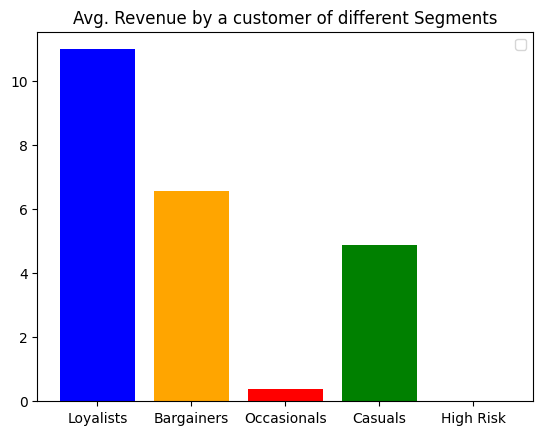

In [38]:
plt.title("Avg. Revenue by a customer of different Segments")
plt.bar(['Loyalists','Bargainers','Occasionals','Casuals','High Risk'],y['Average Revenue Contribution by each'],color=['b','orange','r','g','y'])
plt.legend()